In [1]:
using NCDatasets
using Plots, ColorSchemes, LaTeXStrings
using DataFrames, NCDatasets
using SparseArrays, LinearAlgebra

In [129]:
function remove_extinct(biomass)

    ex = 10^-6
    biomass .= ifelse.(biomass .<= ex, 0.0, biomass) 

    return biomass
    
end


function copio_index_analysis(fsaven, prms=nothing)

    ds = NCDataset(fsaven)
    Fg_p =  ds["Fg_p"][:]
    Fg_b =  ds["Fg_b"][:]

    B, P = get_final_year(ds, ["b", "p"])
    # prms.pulse == 1 ? get_endpoint_copio(Fg_p, Fg_b, ds) : get_copio_over_time(Fg_p, Fg_b, ds)
    tot, adj, copio = get_copio_over_time(B, Fg_b)

    return tot, adj, copio

end 


function get_total_biomass(biomass)

    total = dropdims(sum(biomass, dims=2), dims=2)

    return total

end 


function get_size(arr)

    out = Vector{Int}()
    
    for a in arr
        append!(out, size(a, 2))
    end

    return out

end


function calc_copiotrophy_index(tot, adj)

    copio = adj ./ tot

    return copio

end


function get_copio_over_time(biomass, Fg)

    winners = remove_extinct(biomass)
    tot = total_biomass(winners)
    adj = adj_total_biomass(winners, Fg)
    
    copio = Array{Float64, 2}(undef, size(biomass, 1), size(biomass, 3))
    for t in 1:size(biomass, 3)
        copio[:,t] = adj[:,t] ./ tot[:,t]
    end

    return tot, adj, copio

end


function get_final_year(ds, vars)

    final_yr = Vector{Any}()

    for v in vars
        if v != "o"
            append!(final_yr, [ds[v][:, :, end-7319:end]])
        else
            append!(final_yr, [ds[v][:, end-7319:end]])
        end
    end

    return final_yr

end


function adj_total_biomass(biomass, Fg)

    adj_biomass = zeros(Float64, size(biomass, 1), size(biomass, 2), size(biomass, 3)) 

    for i in 1:size(biomass, 2)
        adj_biomass[:,i,:] = biomass[:,i,:] .* Fg[i]
    end

    # return adj_biomass
    return dropdims(sum(adj_biomass, dims=2), dims=2)

end


function total_biomass(biomass)
    
    total = dropdims(sum(biomass, dims=2), dims=2)

    return total

end


total_biomass (generic function with 2 methods)

In [164]:
fsaven1 = "/home/lee/Dropbox/Development/NPZBD_1D/results/outfiles/Wi100y_231011_23:28_8P20Z13B5D.nc"
fsaven2 = "/home/lee/Dropbox/Development/NPZBD_1D/results/outfiles/Wi100y_231011_20:23_8P20Z13B5D.nc"

"/home/lee/Dropbox/Development/NPZBD_1D/results/outfiles/Wi100y_231011_20:23_8P20Z13B5D.nc"

In [165]:
tot1, adj1, cop1 = copio_index_analysis(fsaven1)
tot2, adj2, cop2 = copio_index_analysis(fsaven2)

([0.40535993300062967 0.40535993300062967 … 0.40535993300062967 0.40535993300062967; 0.40551897766167727 0.40551897766167727 … 0.40551897766167727 0.40551897766167727; … ; 0.018181621917843567 0.018181621917843567 … 0.018181621917843567 0.018181621917843567; 0.01819612719998125 0.01819612719998125 … 0.01819612719998125 0.01819612719998125], [0.18905035454733932 0.18905035454733932 … 0.18905035454733932 0.18905035454733932; 0.18912743867636844 0.18912743867636844 … 0.18912743867636844 0.18912743867636844; … ; 0.0051061002708795425 0.0051061002708795425 … 0.0051061002708795425 0.0051061002708795425; 0.005108362424459035 0.005108362424459035 … 0.005108362424459035 0.005108362424459035], [0.46637651912934786 0.46637651912934786 … 0.46637651912934786 0.46637651912934786; 0.4663836937223605 0.4663836937223605 … 0.4663836937223605 0.4663836937223605; … ; 0.28083854641528877 0.28083854641528877 … 0.28083854641528877 0.28083854641528877; 0.280738992881095 0.280738992881095 … 0.280738992881095 0

In [169]:
function get_zc(H)

    dz = 10
    zc = [dz/2 : dz : H - dz/2;] 

    return zc

end

function plot_copio_heatmaps(copio)

    zc = get_zc(400)

    c_heatmaps(copio, zc)
    # heatmaps(b, zc, filename, "B", var)

end



function c_heatmaps(copio, zc)

    d = -zc[1:40]
    data = copio[1:40, :]
    daily_data = data[:, 1:20:end]
    days = collect(1:size(daily_data, 2))
 
    return heatmap(days, reverse(d), reverse(daily_data), xrotation=45, clim=(0.3, 0.6))


    # f = plot(fig..., 
    # fg_legend = :transparent,
    # size=(1300,1000),
    # plot_title = "$s_name $var over time (0-400m)"
    # )

    # println("Saving fig to $(dir)/$(s_name)_$(filename).png")
    # savefig(f, "$(dir)/$(s_name)_$(filename).png")

end


c_heatmaps (generic function with 1 method)

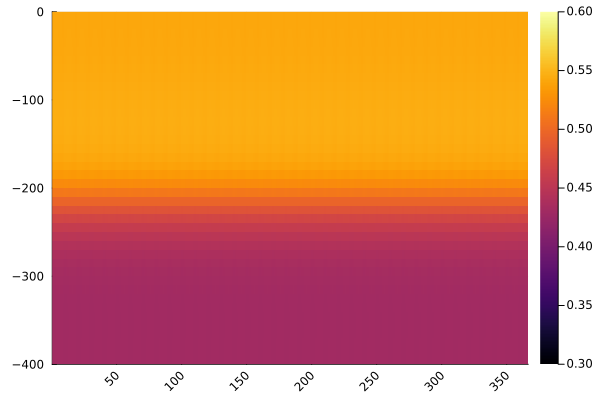

In [170]:
p = plot_copio_heatmaps(cop1)

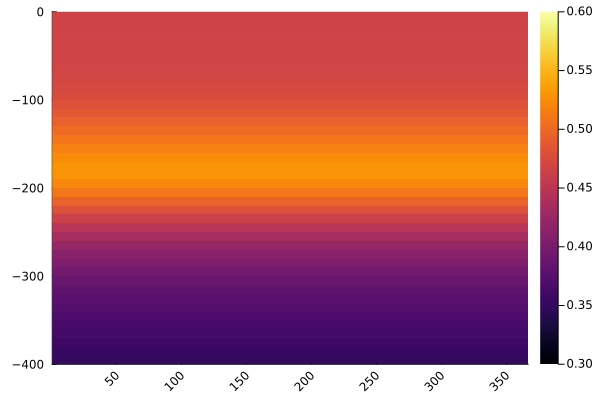

In [171]:
p = plot_copio_heatmaps(cop2)